In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.loadtxt('bv339_prnA-arg347.out', skiprows=0)

In [7]:
x = data[:, 0]
y = data[:, 1]
x=x[:10000] # I take the 10,000 frames, which is 20ns of CpHMD simulation
y=y[:10000]

In [9]:
import numpy as np

# Load all the state vectors for all 4 biliverdins for chain-A(left) and chain-D(right) separately

m_min = 3.5
m_max = 10.0
m_values = np.arange(m_min, m_max + 0.1, 0.5)
print(m_values[8])
prn_A54_list = []
prn_A55_list = []
prn_A110_list = []
prn_A111_list = []

prn_D54_list = []
prn_D55_list = []
prn_D110_list = []
prn_D111_list = []

path_to_state_vectors='../../state_vectors/tetramer_BV_state_vectors'
for m in m_values:
    filename1 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res54_pH{m:.1f}.dat'
    filename2 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res55_pH{m:.1f}.dat'
    filename3 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res110_pH{m:.1f}.dat'
    filename4 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res111_pH{m:.1f}.dat'
    filename5 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res54_pH{m:.1f}.dat'
    filename6 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res55_pH{m:.1f}.dat'
    filename7 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res110_pH{m:.1f}.dat'
    filename8 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res111_pH{m:.1f}.dat'
    data_A54 = np.loadtxt(filename1, max_rows=100000)
    data_A55 = np.loadtxt(filename2, max_rows=100000)
    data_A110 = np.loadtxt(filename3, max_rows=100000)
    data_A111 = np.loadtxt(filename4, max_rows=100000)
    data_D54 = np.loadtxt(filename5, max_rows=100000)
    data_D55 = np.loadtxt(filename6, max_rows=100000)
    data_D110 = np.loadtxt(filename7, max_rows=100000)
    data_D111 = np.loadtxt(filename8, max_rows=100000)
    prn_A54_list.append(data_A54)
    prn_A55_list.append(data_A55)
    prn_A110_list.append(data_A110)
    prn_A111_list.append(data_A111)
    prn_D54_list.append(data_D54)
    prn_D55_list.append(data_D55)
    prn_D110_list.append(data_D110)
    prn_D111_list.append(data_D111)

prn_A54 = np.stack(prn_A54_list, axis=0)
print(prn_A54.shape)
prn_A55 = np.stack(prn_A55_list, axis=0)
print(prn_A55.shape)
prn_A110 = np.stack(prn_A110_list, axis=0)
print(prn_A110.shape)
prn_A111 = np.stack(prn_A111_list, axis=0)
print(prn_A111.shape)
prn_D54 = np.stack(prn_D54_list, axis=0)
print(prn_D54.shape)
prn_D55 = np.stack(prn_D55_list, axis=0)
print(prn_D55.shape)
prn_D110 = np.stack(prn_D110_list, axis=0)
print(prn_D110.shape)
prn_D111 = np.stack(prn_D111_list, axis=0)
print(prn_D111.shape)

7.5
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)


In [11]:
# Frames are written every 1000 steps and MC step is every 100 steps. So every 10nth protonation state
# corresponds to the frame written in the output and visualized in VMD.

# Pluck every 10th value from each state vector to match them with trajectory frames!
prn_A54_10th = prn_A54[:, ::10]
prn_A55_10th = prn_A55[:, ::10]
prn_A110_10th = prn_A110[:, ::10]
prn_A111_10th = prn_A111[:, ::10]
prn_D54_10th = prn_D54[:, ::10]
prn_D55_10th = prn_D55[:, ::10]
prn_D110_10th = prn_D110[:, ::10]
prn_D111_10th = prn_D111[:, ::10]

print(prn_A54_10th.shape)
print(prn_A55_10th.shape)
print(prn_A110_10th.shape)
print(prn_A111_10th.shape)
print(prn_D54_10th.shape)
print(prn_D55_10th.shape)
print(prn_D110_10th.shape)
print(prn_D111_10th.shape)

(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)


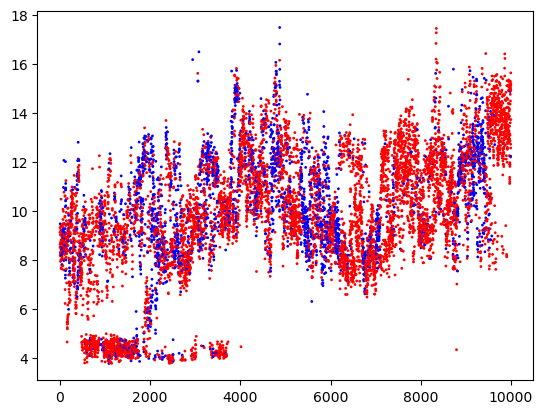

In [13]:
colors = ['red' if val == 0 else 'blue' for val in prn_A54_10th[8]] # [8] array corresponds to pH=7.5
plt.scatter(x, y, color=colors, s=1)
plt.show()

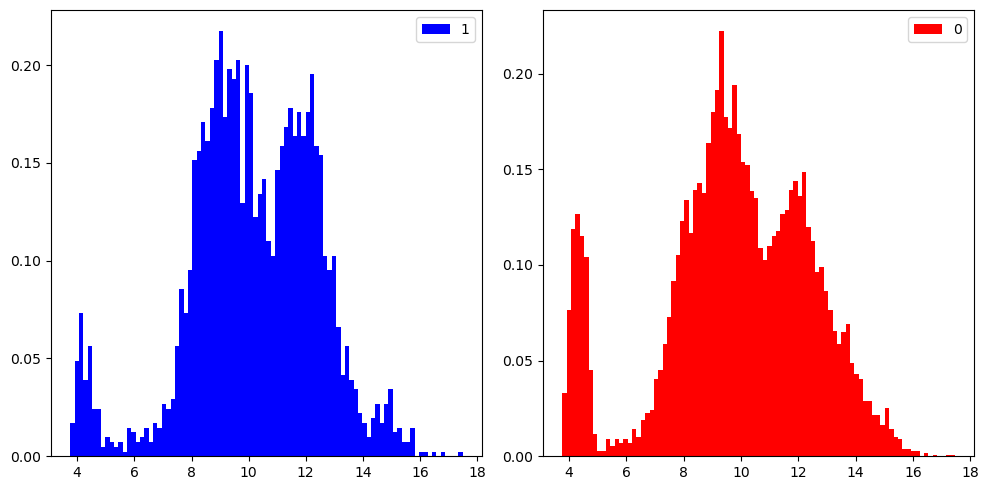

In [15]:
y_zeros = [y_val for y_val, flag in zip(y, prn_A54_10th[8]) if flag == 0]
y_ones = [y_val for y_val, flag in zip(y, prn_A54_10th[8]) if flag == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(y_ones, bins=90, color='blue', density=True, label='1')
ax2.hist(y_zeros, bins=90, color='red', density=True, label='0')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
from scipy.optimize import curve_fit

def triple_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2, amp3, mean3, stddev3):
    gauss1 = amp1 * np.exp(-(x - mean1) ** 2 / (2 * stddev1 ** 2))
    gauss2 = amp2 * np.exp(-(x - mean2) ** 2 / (2 * stddev2 ** 2))
    gauss3 = amp3 * np.exp(-(x - mean3) ** 2 / (2 * stddev3 ** 2))
    return gauss1 + gauss2 + gauss3

y_zeros_hist, y_zeros_bin_edges = np.histogram(y_zeros, bins=90, density=True)
y_ones_hist, y_ones_bin_edges = np.histogram(y_ones, bins=90, density=True)
y_zeros_bin_centers = (y_zeros_bin_edges[:-1] + y_zeros_bin_edges[1:]) / 2
y_ones_bin_centers = (y_ones_bin_edges[:-1] + y_ones_bin_edges[1:]) / 2

initial_guess = [0.1, 4, 1, 0.5, 10, 1, 0.3, 9, 0.1]
popt_zeros, _ = curve_fit(triple_gaussian, y_zeros_bin_centers, y_zeros_hist, p0=initial_guess)
popt_ones, _ = curve_fit(triple_gaussian, y_ones_bin_centers, y_ones_hist, p0=initial_guess)


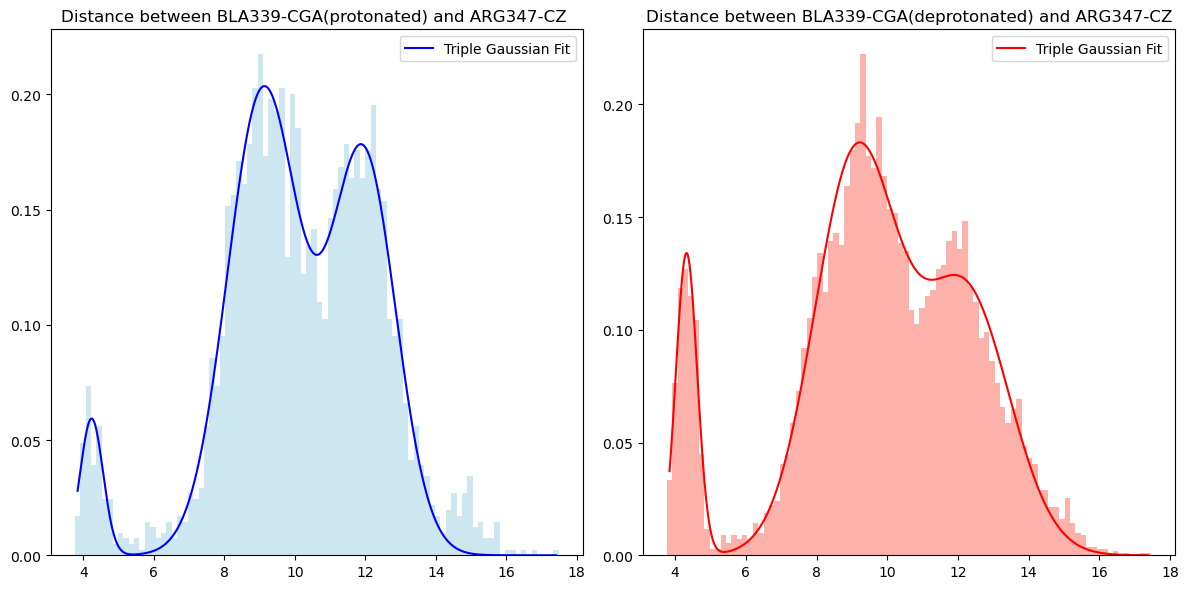

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(y_ones, bins=90, color='Lightblue', density=True, alpha=0.6)
x_fit = np.linspace(min(y_ones_bin_centers), max(y_ones_bin_centers), 1000)
ax1.plot(x_fit, triple_gaussian(x_fit, *popt_ones), color='blue', label='Triple Gaussian Fit')
ax1.set_title('Distance between BLA339-CGA(protonated) and ARG347-CZ ')
ax1.legend()

ax2.hist(y_zeros, bins=90, color='salmon', density=True, alpha=0.6)
x_fit = np.linspace(min(y_zeros_bin_centers), max(y_zeros_bin_centers), 1000)
ax2.plot(x_fit, triple_gaussian(x_fit, *popt_zeros), color='red', label='Triple Gaussian Fit')
ax2.set_title('Distance between BLA339-CGA(deprotonated) and ARG347-CZ')
ax2.legend()

plt.tight_layout()
plt.show()

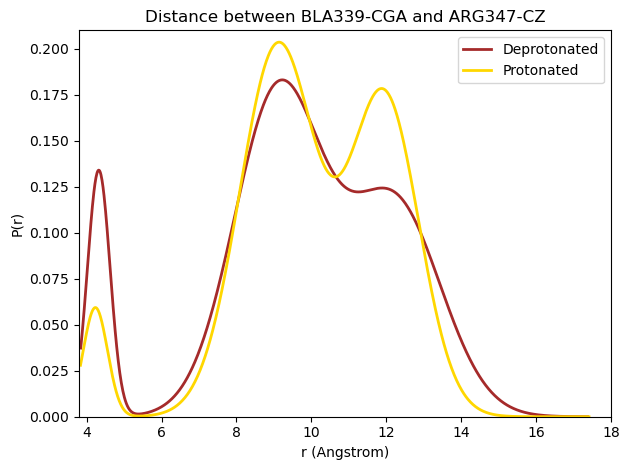

In [21]:
x_fit_zeros = np.linspace(min(y_zeros_bin_centers), max(y_zeros_bin_centers), 1000)
x_fit_ones = np.linspace(min(y_ones_bin_centers), max(y_ones_bin_centers), 1000)


plt.plot(x_fit_zeros, triple_gaussian(x_fit_zeros, *popt_zeros), color='brown', linestyle='-', linewidth=2, label='Deprotonated')
plt.plot(x_fit_ones, triple_gaussian(x_fit_ones, *popt_ones), color='gold', linestyle='-', linewidth=2, label='Protonated')

plt.title('Distance between BLA339-CGA and ARG347-CZ')
plt.xlabel('r (Angstrom)')
plt.ylabel('P(r)')
plt.ylim(0,0.21)
plt.xlim(3.8,18)
plt.legend()
plt.grid(False)

plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()